In [1]:
from run_cvae import run_cvae

Using TensorFlow backend.


In [2]:
cvae = run_cvae(1, './cvae_input.h5')

Train on 2682 samples, validate on 671 samples
Epoch 1/150
2682/2682 [==============================] - 2s 784us/step - loss: 1844.3861 - val_loss: 706.5714
Epoch 2/150
2682/2682 [==============================] - 1s 236us/step - loss: 480.0591 - val_loss: 422.4690
Epoch 3/150
2682/2682 [==============================] - 1s 236us/step - loss: 374.5745 - val_loss: 365.1753
Epoch 4/150
2682/2682 [==============================] - 1s 234us/step - loss: 317.7438 - val_loss: 350.0166
Epoch 5/150
2682/2682 [==============================] - 1s 237us/step - loss: 312.7502 - val_loss: 334.9080
Epoch 6/150
2682/2682 [==============================] - 1s 235us/step - loss: 278.0362 - val_loss: 330.1972
Epoch 7/150
2682/2682 [==============================] - 1s 235us/step - loss: 284.9877 - val_loss: 319.8920
Epoch 8/150
2682/2682 [==============================] - 1s 236us/step - loss: 249.5310 - val_loss: 312.9168
Epoch 9/150
2682/2682 [==============================] - 1s 235us/step - loss: 2

In [3]:
cvae.graph.save_weights('cvae.h5')

In [4]:
import numpy as np

In [5]:
import h5py

In [6]:
cm_h5 = h5py.File('./cvae_input.h5', 'r', libver='latest', swmr=True)
cm_data = cm_h5[u'contact_maps']

In [7]:
cm_data.shape

(3353, 52, 52, 1)

In [8]:
embed_res = cvae.embed(cm_data)

In [9]:
import matplotlib.pyplot as plt 

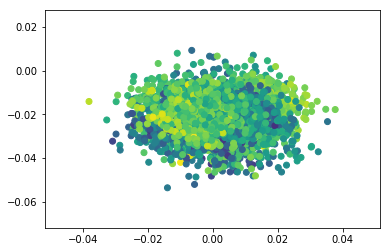

In [10]:
color = [np.sum(cm) for cm in cm_data] 
plt.scatter(embed_res[:,0], embed_res[:,1], c=color)

In [11]:
from run_cvae import CVAE 

In [31]:
cvae2 = CVAE((52, 52, 1), 3)

In [25]:
for i, w in enumerate(cvae.graph.get_weights()): 
    print w == cvae2.graph.get_weights()[i]

[[[[False False False False False False False False False False False
    False False False False False False False False False False False
    False False False False False False False False False False False
    False False False False False False False False False False False
    False False False False False False False False False False False
    False False False False False False False False False]]

  [[False False False False False False False False False False False
    False False False False False False False False False False False
    False False False False False False False False False False False
    False False False False False False False False False False False
    False False False False False False False False False False False
    False False False False False False False False False]]

  [[False False False False False False False False False False False
    False False False False False False False False False False False
    False False False False False Fals

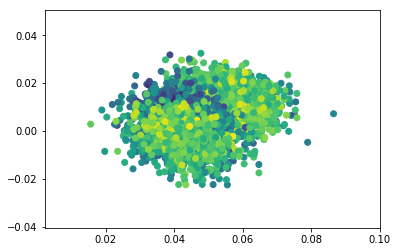

In [32]:
embed_res2 = cvae2.embed(cm_data)

plt.scatter(embed_res2[:,0], embed_res2[:,1], c=color)

In [33]:
cvae2.graph.load_weights('cvae.h5')

In [34]:
for i, w in enumerate(cvae.graph.get_weights()): 
    print w == cvae2.graph.get_weights()[i]

[[[[ True  True  True  True  True  True  True  True  True  True  True
     True  True  True  True  True  True  True  True  True  True  True
     True  True  True  True  True  True  True  True  True  True  True
     True  True  True  True  True  True  True  True  True  True  True
     True  True  True  True  True  True  True  True  True  True  True
     True  True  True  True  True  True  True  True  True]]

  [[ True  True  True  True  True  True  True  True  True  True  True
     True  True  True  True  True  True  True  True  True  True  True
     True  True  True  True  True  True  True  True  True  True  True
     True  True  True  True  True  True  True  True  True  True  True
     True  True  True  True  True  True  True  True  True  True  True
     True  True  True  True  True  True  True  True  True]]

  [[ True  True  True  True  True  True  True  True  True  True  True
     True  True  True  True  True  True  True  True  True  True  True
     True  True  True  True  True  Tru

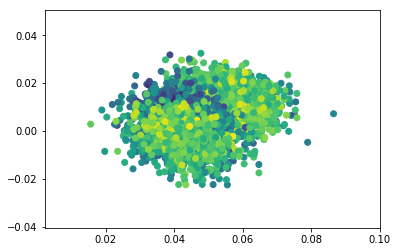

In [35]:
embed_res2 = cvae2.embed(cm_data)

plt.scatter(embed_res2[:,0], embed_res2[:,1], c=color)

In [36]:
cvae_test = CVAE((53, 53, 1), 4)

In [37]:
cvae_test.load_weights('./cvae.h5')

ValueError: Dimension 0 in both shapes must be equal, but are 46656 and 43264. Shapes are [46656,128] and [43264,128]. for 'Assign_72' (op: 'Assign') with input shapes: [46656,128], [43264,128].